## Winston's code

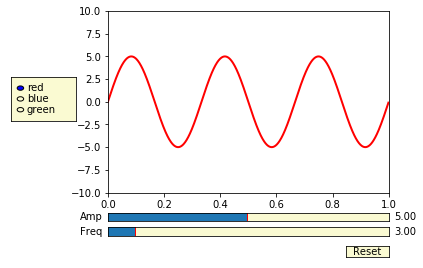

In [1]:
from numpy import pi, sin
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

def signal(amp, freq):
    return amp * sin(2 * pi * freq * t)

axis_color = 'lightgoldenrodyellow'

fig = plt.figure()
ax = fig.add_subplot(111)

# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(left=0.25, bottom=0.25)

t = np.arange(0.0, 1.0, 0.001)
amp_0 = 5
freq_0 = 3

# Draw the initial plot
# The 'line' variable is used for modifying the line later
[line] = ax.plot(t, signal(amp_0, freq_0), linewidth=2, color='red')
ax.set_xlim([0, 1])
ax.set_ylim([-10, 10])

# Add two sliders for tweaking the parameters

# Define an axes area and draw a slider in it
amp_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
amp_slider = Slider(amp_slider_ax, 'Amp', 0.1, 10.0, valinit=amp_0)

# Draw another slider
freq_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
freq_slider = Slider(freq_slider_ax, 'Freq', 0.1, 30.0, valinit=freq_0)

# Define an action for modifying the line when any slider's value changes
def sliders_on_changed(val):
    line.set_ydata(signal(amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()
amp_slider.on_changed(sliders_on_changed)
freq_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    freq_slider.reset()
    amp_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

# Add a set of radio buttons for changing color
color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
def color_radios_on_clicked(label):
    line.set_color(label)
    fig.canvas.draw_idle()
color_radios.on_clicked(color_radios_on_clicked)

plt.show()

In [3]:
import IPython

IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

NameError: ignored

In [0]:
import plotly 
plotly.tools.set_credentials_file(username='wel51x', api_key='Z30pD4I7y04pvcg22vbu')

In [5]:
import plotly.plotly as py
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

py.iplot(data, filename='Single Sine Wave')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~wel51x/0 or inside your plot.ly account where it is named 'Single Sine Wave'


In [8]:
steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Sine Wave Slider')